## Grid search

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




In [6]:
breast_cancer, breast_cancer_y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
breast_cancer.head()

cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(breast_cancer, breast_cancer_y, test_size=0.33, random_state=42)
print('Liczba obserwacji w zbiorze treningowym:', cancer_X_train.shape[0])
print('Liczba obserwacji w zbiorze testowym:', cancer_X_test.shape[0])

print('Liczba zmiennych w modelu:', cancer_X_train.shape[1])

Liczba obserwacji w zbiorze treningowym: 381
Liczba obserwacji w zbiorze testowym: 188
Liczba zmiennych w modelu: 30


In [15]:
parameters = {'n_estimators':list(np.arange(10, 500, 10, dtype = 'int'))}
rf_cf = RandomForestClassifier()
## domyslny parametcv = 5

clf = GridSearchCV(rf_cf, parameters, scoring = 'roc_auc')
clf.fit(cancer_X_train, cancer_y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300, ...]},
             scoring='roc_auc')

In [18]:
clf_cv_results_df = pd.DataFrame(clf.cv_results_)
clf_cv_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012298,0.001326,0.002561,0.000184,10,{'n_estimators': 10},0.998204,0.945341,0.995231,0.952678,0.984226,0.975136,0.021958,49
1,0.021694,0.000308,0.003225,0.000256,20,{'n_estimators': 20},1.000000,0.970653,0.993397,0.965517,0.994497,0.984813,0.013935,47
2,0.030721,0.000602,0.003532,0.000039,30,{'n_estimators': 30},1.000000,0.980191,0.988995,0.986060,0.994131,0.989875,0.006778,1
3,0.040370,0.000634,0.004242,0.000328,40,{'n_estimators': 40},0.996049,0.975055,0.996698,0.978357,0.993397,0.987911,0.009275,20
4,0.051943,0.001236,0.005576,0.001633,50,{'n_estimators': 50},1.000000,0.977256,0.991930,0.967351,0.993397,0.985987,0.011917,39
5,0.062004,0.001077,0.005948,0.001007,60,{'n_estimators': 60},0.997845,0.964784,0.991563,0.970286,0.995965,0.984088,0.013779,48
6,0.069918,0.000978,0.005931,0.000134,70,{'n_estimators': 70},1.000000,0.976156,0.990462,0.968819,0.995965,0.986280,0.011891,37
7,0.079686,0.000887,0.006442,0.000040,80,{'n_estimators': 80},1.000000,0.978723,0.994131,0.967718,0.994497,0.987014,0.011969,28
8,0.089981,0.001674,0.007144,0.000112,90,{'n_estimators': 90},1.000000,0.981658,0.994497,0.966251,0.993764,0.987234,0.012081,27
9,0.098831,0.001656,0.007612,0.000154,100,{'n_estimators': 100},0.999641,0.976156,0.993764,0.962949,0.993397,0.985181,0.013608,46


<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_test_score'>

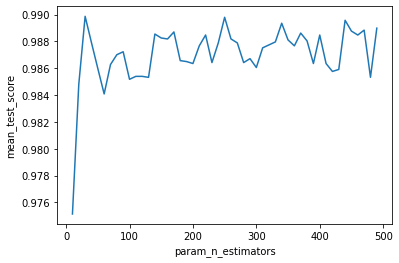

In [27]:
chart = sns.lineplot(data = clf_cv_results_df, x = 'param_n_estimators', y = 'mean_test_score')
chart



Best point - n_estomatores:  30 
mean test score:  0.9898752751283932


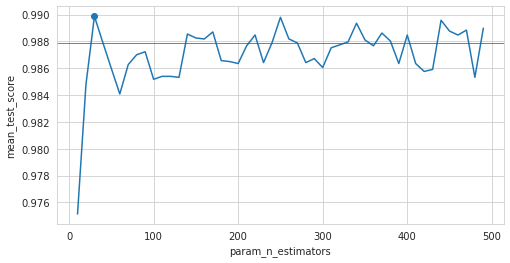

In [66]:
# chart = sns.lineplot(data = clf_cv_results_df, x = 'param_n_estimators', y = 'mean_test_score')
best_index = clf_cv_results_df.mean_test_score.argmax()
best_point = clf_cv_results_df.loc[best_index,:]

print('Best point - n_estomatores: ', best_point['param_n_estimators'], '\nmean test score: ', best_point['mean_test_score'])
theta = 0.002

fig, ax = plt.subplots(figsize=(8,4))
chart = sns.lineplot(ax=ax, data = clf_cv_results_df, x = 'param_n_estimators', y = 'mean_test_score')
chart.axes.axhline(y = best_point['mean_test_score'] - theta,  color='red', linewidth=1, alpha=.7)
plt.scatter(x = best_point['param_n_estimators'], y= best_point['mean_test_score'], marker='o')

## Rashomon set
Source: Semenova, L., Rudin, C. and Parr, R., 2019. A study in Rashomon curves and volumes: A new perspective on generalization and model simplicity in machine learning. [arXiv preprint arXiv:1908.01755](https://arxiv.org/abs/1908.01755).


Definition **Rashomon set**


Given $\theta > 0$, a data set $S$, a hypothesis space $\mathcal{F}$, and a loss function $\phi$, the Rashomon set $\hat{R}_{set}(\mathcal{F}, \theta)$  is the subspace of the hypothesis space defined as follows:
$$ \hat{R}_{set}(\mathcal{F}, \theta) := {f \in \mathcal{F} : \hat{L}(f) \leq \hat{L}( \hat{f}) + \theta},$$
where $\hat{f}$ is an empirical risk minimizer for the training data $S$ with respect to a loss function $\phi:
\hat{f}\in argmin_{f \in \mathcal{F}} \hat{L} (f).$

![](image/rashomon_set_2d.png)

Definition 2 **Rashomon ratio**

Let $F$ be a hypothesis space given a data set $S$. The Rashomon ratio is a ratio of the volume of models inside the Rashomon set $\hat{R}_{set}(\mathcal{F}, \theta)$ to the volume of models in the hypothesis space $\mathcal{F}$:
$$ \hat{R}_{ratio}(\mathcal{F}, \theta) = \frac{\mathcal{V}( \hat{R}_{set}(\mathcal{F}, \theta))}{\mathcal{V}(\mathcal{F})}$$

## Jak będziecie generować zbiory Rashomon?

Możemy zastosować random search dla wybranego algorytmu. Przykładowe zakresy hiperparametrów dla algorytmów (co prawda w R, ale analogiczne można znaleźć dla algorytmów w scikit-learn) można znaleźć w artykule (tabela 1):
[Tunability: Importance of Hyperparameters of Machine
Learning Algorithms](https://jmlr.org/papers/volume20/18-444/18-444.pdf)

![](image/tunability.png)



### Pytania badawcze:
- dla wybranego algorytmu, które hiperparametry powinniśmy zmieniać (i jak?) żeby budować Rashomon set? Może da się to robić mądrzej niż random search

- zależność pomiędzy Rashomon ratio i funkcją straty
![](image/rashomon_curve_general_ml.png)

## Po co nam Rashomon set?

Wytrenowane modele mogą mieć różną strukturę i zależność od zmiennych może być różna:

![](image/rashomon_breiman.png)
Source: Breiman, L., 2001. Statistical modeling: The two cultures (with comments and a rejoinder by the author). Statistical science, 16(3), pp.199-231.

#### Dla modeli liniowych możemy patrzeć bezpośrednio na współczynniki, a co z black-boxami?

Spróbujemy użyć technik XAI.

![](image/04_covid_pdp_xgboost_monotnic.png)
![](image/04_covid_pdp_xgboost.png)
![](image/04_covid_pdp_diff_models.png)


[Rashomon effect and the severe condition after covid-19 infections](https://medium.com/responsibleml/rashomon-effect-and-the-severe-condition-after-covid-19-infections-af3cfcc4db4)

### Pytanie badawcze:
- dla wybranego modelu (rekomendowany gbm/xgboost) jakie parametry musimy zmieniać żeby uzyskać różne krzywe PDP
- wprowadzenie miary oceny *zróżnicowania* modeli w oparciu o krzywe PDP